# Exploration

In [13]:
import pyreadr
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.preprocessing import PolynomialFeatures

In [3]:
prostate_rfile = pyreadr.read_r("./media/ElemStatLearn/data/prostate.RData")
prostate = prostate_rfile['prostate']
prostate.reset_index(drop=True, inplace=True)

In [30]:
prostate

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa,train
0,-0.579818,2.769459,50,-1.386294,0,-1.386294,6,0,-0.430783,True
1,-0.994252,3.319626,58,-1.386294,0,-1.386294,6,0,-0.162519,True
2,-0.510826,2.691243,74,-1.386294,0,-1.386294,7,20,-0.162519,True
3,-1.203973,3.282789,58,-1.386294,0,-1.386294,6,0,-0.162519,True
4,0.751416,3.432373,62,-1.386294,0,-1.386294,6,0,0.371564,True
...,...,...,...,...,...,...,...,...,...,...
92,2.830268,3.876396,68,-1.386294,1,1.321756,7,60,4.385147,True
93,3.821004,3.896909,44,-1.386294,1,2.169054,7,40,4.684443,True
94,2.907447,3.396185,52,-1.386294,1,2.463853,7,10,5.143124,False
95,2.882564,3.773910,68,1.558145,1,1.558145,7,80,5.477509,True


## Plotting

<Figure size 800x400 with 0 Axes>

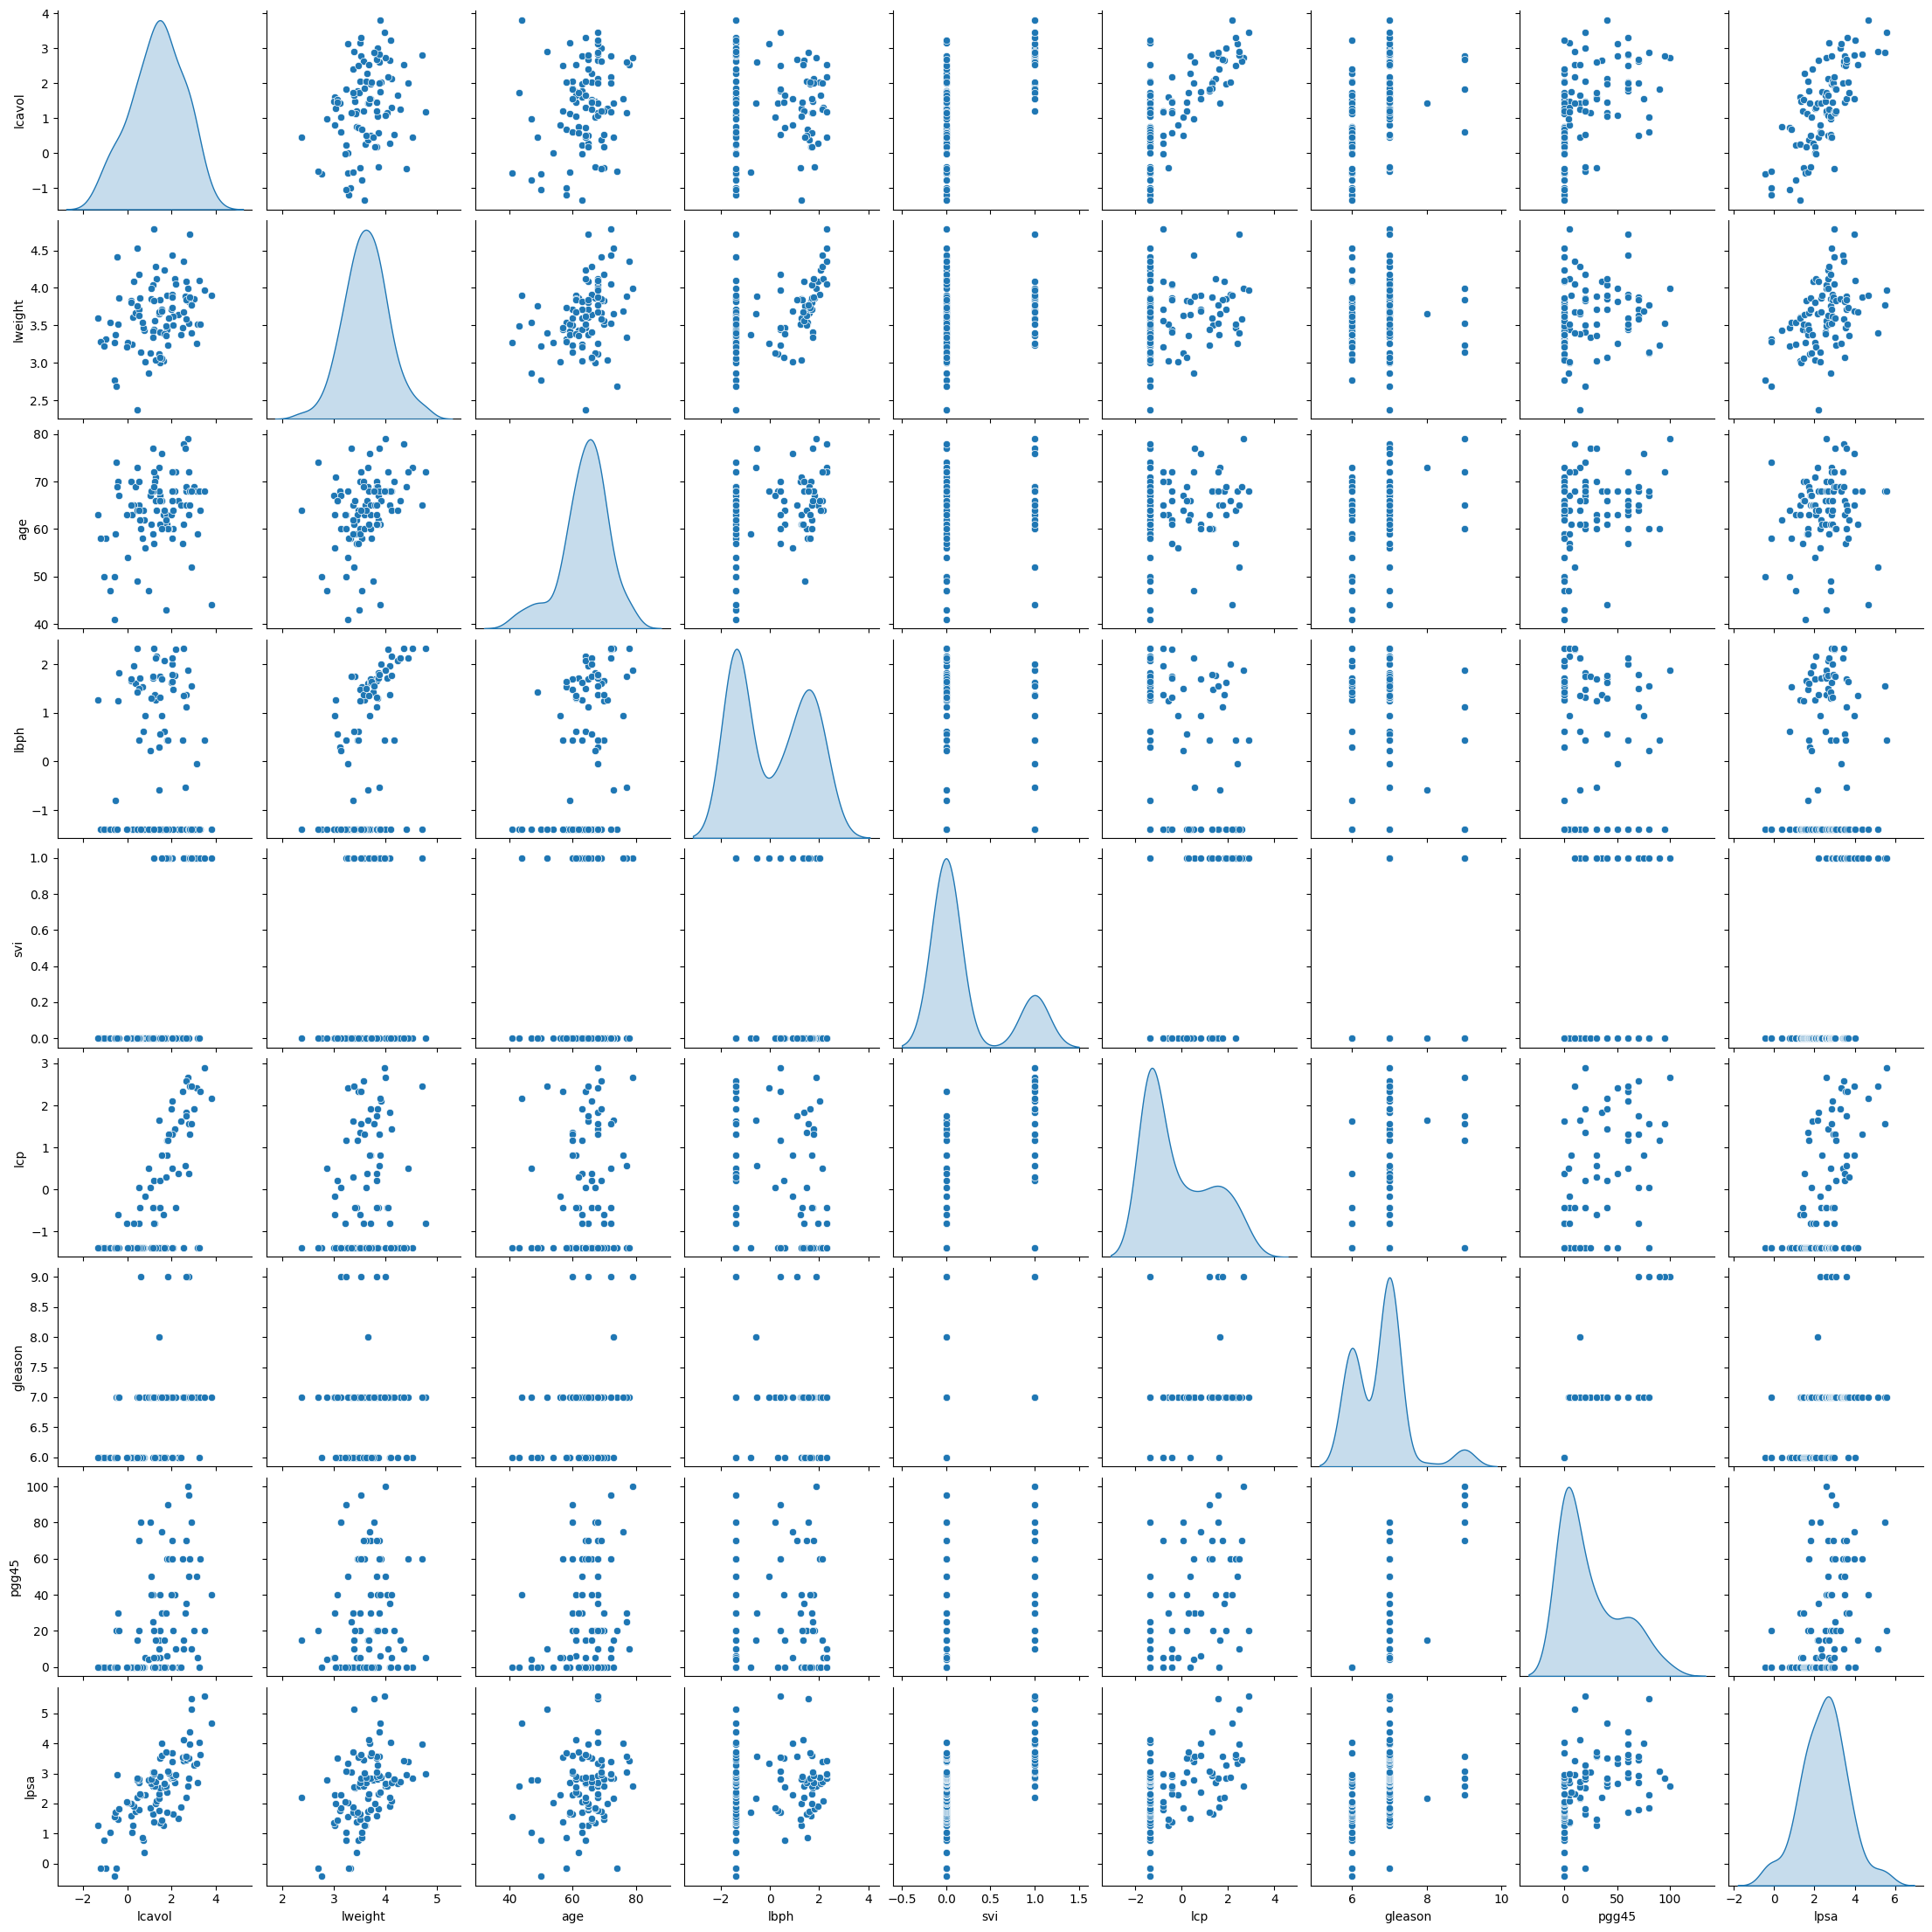

In [6]:
plt.figure(figsize=(8,4))

sns.pairplot(prostate[prostate.columns[:-1]], diag_kind='kde')

<Axes: >

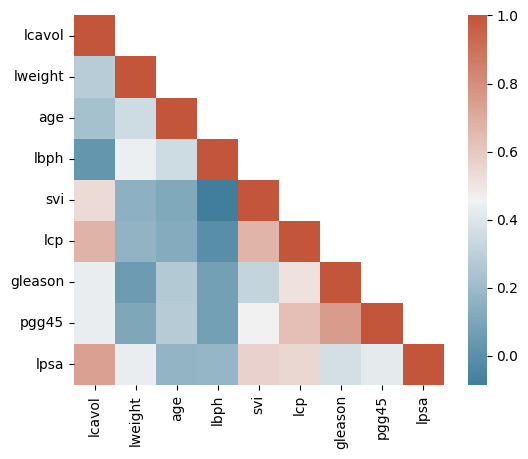

In [82]:
corr_prostate = prostate.drop(['train'], axis=1).corr()

mask = np.triu(np.ones_like(corr_prostate, dtype=bool),k=1)
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr_prostate, mask=mask, cmap=cmap, square=True)

## Linear Regression

### sklearn

In [62]:
# udpate 0
prostate0 = prostate.drop(['lpsa'], axis=1)
prostatey = prostate[['lpsa']]
lr0 = linear_model.LinearRegression()
lr0.fit(prostate0.drop(['train'],axis=1),prostatey)

LinearRegression()

In [68]:
# update 1
prostate1 = prostate0.drop([39,47,95])
prostatey1 = prostatey.drop([39,47,95])
lr1 = linear_model.LinearRegression(fit_intercept=False)
lr_1 = lr1.fit(prostate1,prostatey1)

# update 2
prostate2 = prostate1[prostate1.columns[:-1]]
lr2 = linear_model.LinearRegression()
lr_2 = lr2.fit(prostate2,prostatey1)

# update 3
prostate3 = prostate2.drop(['gleason','pgg45'], axis=1)
lr3 = linear_model.LinearRegression()
lr_3 = lr3.fit(prostate3,prostatey1)

# update 4
prostate4 = prostate3.drop(['age','lcp','lbph'],axis=1)
lr4 = linear_model.LinearRegression()
lr_4 = lr4.fit(prostate4,prostatey1)

### statsmodel

In [103]:
lr = smf.ols('lpsa ~ lcavol + lweight + age + lbph + svi + lcp + gleason + pgg45 + train' , data=prostate).fit()
print(lr.summary())
print('Parameters: \n', lr.params)
print('R2: ', lr.rsquared)

                            OLS Regression Results                            
Dep. Variable:                   lpsa   R-squared:                       0.663
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     19.05
Date:                Mon, 29 Apr 2024   Prob (F-statistic):           3.71e-17
Time:                        16:11:52   Log-Likelihood:                -98.247
No. Observations:                  97   AIC:                             216.5
Df Residuals:                      87   BIC:                             242.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.1773      1.339      0.132

In [113]:
lr0 = smf.ols('lpsa ~ lcavol + lweight + age + lbph + svi + lcp + gleason + pgg45' , data=prostate.drop([39,47,95])).fit()
print(lr0.summary())
print('Parameters: \n', lr0.params)
print('R2: ', lr0.rsquared)

                            OLS Regression Results                            
Dep. Variable:                   lpsa   R-squared:                       0.656
Model:                            OLS   Adj. R-squared:                  0.624
Method:                 Least Squares   F-statistic:                     20.27
Date:                Mon, 29 Apr 2024   Prob (F-statistic):           8.56e-17
Time:                        16:22:10   Log-Likelihood:                -94.214
No. Observations:                  94   AIC:                             206.4
Df Residuals:                      85   BIC:                             229.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.3387      1.331     -0.254      0.8

In [115]:
# no intercept modelling
lr1 = smf.ols('lpsa ~ lcavol + lweight + age + lbph + svi + lcp + gleason + pgg45 - 1' , data=prostate.drop([39,47,95])).fit()
print(lr1.summary())
print('Parameters: \n', lr1.params)
print('R2: ', lr1.rsquared)

                                 OLS Regression Results                                
Dep. Variable:                   lpsa   R-squared (uncentered):                   0.940
Model:                            OLS   Adj. R-squared (uncentered):              0.934
Method:                 Least Squares   F-statistic:                              168.6
Date:                Mon, 29 Apr 2024   Prob (F-statistic):                    3.53e-49
Time:                        16:23:59   Log-Likelihood:                         -94.249
No. Observations:                  94   AIC:                                      204.5
Df Residuals:                      86   BIC:                                      224.8
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [116]:
lr2 = smf.ols('lpsa ~ lcavol + lweight + age + lbph + svi + lcp' , data=prostate.drop([39,47,95])).fit()
print(lr2.summary())
print('Parameters: \n', lr2.params)
print('R2: ', lr2.rsquared)

                            OLS Regression Results                            
Dep. Variable:                   lpsa   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.623
Method:                 Least Squares   F-statistic:                     26.61
Date:                Mon, 29 Apr 2024   Prob (F-statistic):           8.98e-18
Time:                        16:24:07   Log-Likelihood:                -95.406
No. Observations:                  94   AIC:                             204.8
Df Residuals:                      87   BIC:                             222.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2579      0.895      0.288      0.7

In [117]:
lr3 = smf.ols('lpsa ~ lcavol + lweight+ svi' , data=prostate.drop([39,47,95])).fit()
print(lr3.summary())
print('Parameters: \n', lr3.params)
print('R2: ', lr3.rsquared)

                            OLS Regression Results                            
Dep. Variable:                   lpsa   R-squared:                       0.634
Model:                            OLS   Adj. R-squared:                  0.621
Method:                 Least Squares   F-statistic:                     51.87
Date:                Mon, 29 Apr 2024   Prob (F-statistic):           1.47e-19
Time:                        16:24:42   Log-Likelihood:                -97.197
No. Observations:                  94   AIC:                             202.4
Df Residuals:                      90   BIC:                             212.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.8611      0.622     -1.384      0.1

In [122]:
#  residual sum of squares (RSS) comparison between the two models
sm.stats.anova_lm(lr3,lr2)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,90.0,43.529704,0.0,NaN,NaN,NaN
1,87.0,41.902082,3.0,1.627622,1.126461,0.342897


In [147]:
lr1_residuals = lr1.resid
lr1_pred = lr1.predict()

In [149]:
# new prediction
new_data = pd.DataFrame({'lcavol': [-0.1], 'lweight': [2.5], 'svi': [0]})

prediction = lr3.get_prediction(new_data)
prediction_summary = prediction.summary_frame(alpha=0.05)
prediction_summary

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,0.797824,0.206851,0.386878,1.208769,-0.643646,2.239294


In [5]:
# adding interactions
lr_interactions = smf.ols('lpsa ~ lcavol * lweight * svi' , data=prostate.drop([39,47,95])).fit()
lr_interactions.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   lpsa   R-squared:                       0.662
Model:                            OLS   Adj. R-squared:                  0.634
Method:                 Least Squares   F-statistic:                     24.06
Date:                Mon, 29 Apr 2024   Prob (F-statistic):           8.22e-18
Time:                        17:07:04   Log-Likelihood:                -93.401
No. Observations:                  94   AIC:                             202.8
Df Residuals:                      86   BIC:                             223.1
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -2.0178      0.889     -2.269      0.026      -3.786      -0.250
lcavol                 1.2819      0.697      1.839      0.069      -0.104       2.668
lweight                1.0173      0.254      4.011      0.000       0.513       1.521
lcavol:lweight        -0.2164      0.193     -1.121      0.265      -0.600       0.167
svi                   17.9226     10.128      1.770      0.080      -2.211      38.056
lcavol:svi            -5.5357      3.803     -1.456      0.149     -13.096       2.024
lweight:svi           -4.7592      2.743     -1.735      0.086     -10.212       0.693
lcavol:lweight:svi     1.5294      1.025      1.492      0.139      -0.508       3.567
==============================================================================
Omnibus:                        0.310   Durbin-Watson:                   1.599
Prob(Omnibus):                  0.857   Jarque-Bera (JB):                0.485
Skew:                           0.060   Prob(JB):                        0.785
Kurtosis:                       2.669   Cond. No.                     1.34e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.34e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [6]:
lr_sndOrd = smf.ols('lpsa ~ lcavol + I(lcavol**2) + lweight + I(lweight**2) + svi + I(svi**2) + I(lcavol*lweight) + I(lcavol*svi) + I(lweight*svi)' , data=prostate.drop([39,47,95])).fit()
lr_sndOrd.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   lpsa   R-squared:                       0.660
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                     20.66
Date:                Mon, 29 Apr 2024   Prob (F-statistic):           5.08e-17
Time:                        17:10:15   Log-Likelihood:                -93.616
No. Observations:                  94   AIC:                             205.2
Df Residuals:                      85   BIC:                             228.1
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               2.6880      3.502      0.768      0.445      -4.275       9.650
lcavol                  1.3884      0.754      1.841      0.069      -0.111       2.888
I(lcavol ** 2)          0.0085      0.064      0.134      0.894      -0.119       0.136
lweight                -1.6515      1.980     -0.834      0.407      -5.589       2.286
I(lweight ** 2)         0.3719      0.280      1.327      0.188      -0.185       0.929
svi                     1.7231      1.157      1.489      0.140      -0.577       4.024
I(svi ** 2)             1.7231      1.157      1.489      0.140      -0.577       4.024
I(lcavol * lweight)    -0.2476      0.220     -1.124      0.264      -0.686       0.190
I(lcavol * svi)         0.1004      0.315      0.319      0.751      -0.527       0.727
I(lweight * svi)       -0.8134      0.634     -1.284      0.203      -2.073       0.446
==============================================================================
Omnibus:                        1.295   Durbin-Watson:                   1.541
Prob(Omnibus):                  0.523   Jarque-Bera (JB):                1.099
Skew:                           0.021   Prob(JB):                        0.577
Kurtosis:                       2.472   Cond. No.                     7.89e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.76e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [21]:
prostate_indvar = prostate[['lcavol', 'lweight']]  # Independent variables
prostate_depvar = prostate['lpsa']  # Dependent variable

polynomial_features= PolynomialFeatures(degree=2)
poly = polynomial_features.fit_transform(prostate_indvar)

lr_poly = sm.OLS(prostate_depvar, sm.add_constant(prostate_indvar)).fit()
lr_poly.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   lpsa   R-squared:                       0.596
Model:                            OLS   Adj. R-squared:                  0.587
Method:                 Least Squares   F-statistic:                     69.19
Date:                Mon, 29 Apr 2024   Prob (F-statistic):           3.35e-19
Time:                        17:19:30   Log-Likelihood:                -107.16
No. Observations:                  97   AIC:                             220.3
Df Residuals:                      94   BIC:                             228.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.8134      0.653     -1.246      0.216      -2.110       0.483
lcavol         0.6515      0.067      9.734      0.000       0.519       0.784
lweight        0.6647      0.184      3.610      0.000       0.299       1.030
==============================================================================
Omnibus:                        0.396   Durbin-Watson:                   1.460
Prob(Omnibus):                  0.820   Jarque-Bera (JB):                0.434
Skew:                           0.148   Prob(JB):                        0.805
Kurtosis:                       2.858   Cond. No.                         36.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""